In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("./Train.csv")
test = pd.read_csv("./Test.csv")

train = np.array(train)
test = np.array(test)

print(train.shape,test.shape)

(1600, 6) (400, 5)


In [6]:
X_train = train[:,:-1]
Y_train = train[:,-1]

X_test = test

print(X_train.shape,Y_train.shape)
print(X_test.shape)

(1600, 5) (1600,)
(400, 5)


In [7]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
X_train = (X_train-u)/std
X_test = (X_test-u)/std

In [8]:
ones = np.ones((X_train.shape[0],1))
x_ = np.array(np.hstack((ones,X_train)))
print(x_.shape)

(1600, 6)


In [17]:
def hypothesis(X,W):
    return np.dot(X,W)

def loss(X,Y,W):
    m = X.shape[0]
    y_ = hypothesis(X,W)
    e = np.sum((y_-Y)**2)

    return e/m

def grad(X,Y,W):
    m = X.shape[0]
    y_ = hypothesis(X,W)
    grad = np.dot(X.T,(y_-Y))

    return grad/m

def gradient_descent(X,Y,lr=0.05,max_itr=1000):
    m,n = X.shape
    W = np.zeros((n,))

    error = []

    for i in range(max_itr):
        y_ = hypothesis(X,W)
        err = loss(X,Y,W)
        error.append(err)

        g = grad(X,Y,W)
        W = W - lr*g

    return W,error

In [18]:
weights,loss = gradient_descent(x_,Y_train)

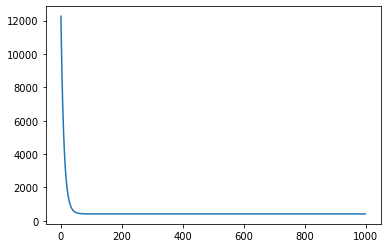

In [19]:
plt.plot(loss)
plt.show()

In [20]:
one = np.ones((X_test.shape[0],1))
x_test_ = np.hstack((one,X_test))
print(x_test_.shape)

(400, 6)


In [21]:
y_pred = hypothesis(x_test_,weights)
print(y_pred.shape)
print(y_pred[:5])

(400,)
[114.58368923 118.01281466 -21.73985233 -43.93689854 -95.91489844]
